## 提示词

``` 
任务：绘制学习曲线。给我Python代码，以实现绘制学习曲线的功能。学习曲线的形状是先平缓（代表投入很多学习但进度很慢），然后快速增加，然后又开始趋于平缓的S型曲线。下面是该学习曲线图上的文字：
Learning curve
Plateau
you did it!
Performance
Steep acceleration
Slow beginning
Number of trials or attempts at learning
注意：“Number of trials or attempts at learning”应当从0开始，而“Performance”要以百分比表示，适当调整图片上文字的位置（尤其是“Slow beginning”），避免被曲线遮挡
```


## LLM输出代码与绘制结果

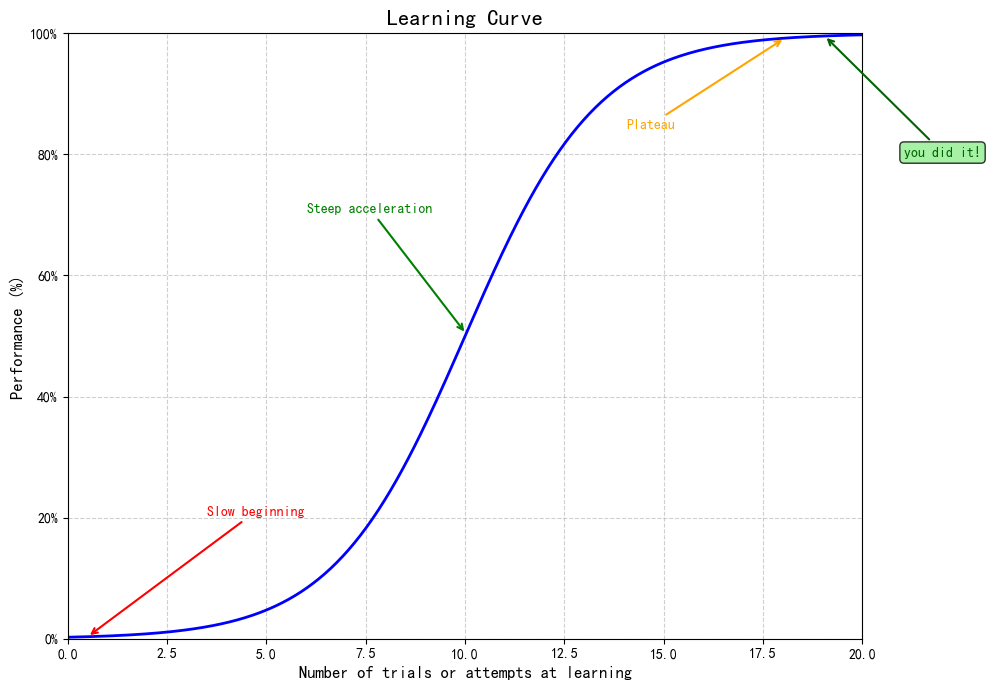

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import expit  # Sigmoid函数

# 设置中文字体支持（如果需要）
plt.rcParams['font.sans-serif'] = ['SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

def generate_learning_curve():
    """
    生成模拟的学习曲线数据
    """
    # x轴：学习尝试次数或时间点 (从0开始)
    x = np.linspace(0, 20, 400)  # 调整范围从0到20，更符合"trials/attempts"的含义
    
    # 使用调整后的Sigmoid函数来模拟学习曲线
    # 将x进行缩放和平移，使其适合sigmoid函数的输入范围
    # Sigmoid函数输入通常在[-6, 6]左右变化较大，我们将其映射到[0, 20]
    x_scaled = (x - 10) * 0.6  # 中心在10，缩放0.6倍，使曲线在中间陡峭
    
    y = expit(x_scaled)  # y值在[0, 1]之间
    
    # 将y值转换为百分比 [0%, 100%]
    y_percentage = y * 100

    return x, y_percentage

def plot_learning_curve():
    """
    绘制学习曲线，并添加标注
    """
    x, y = generate_learning_curve()
    
    fig, ax = plt.subplots(figsize=(10, 7))
    
    ax.plot(x, y, label='Learning Curve', color='blue', linewidth=2)
    
    # 添加标题和轴标签
    ax.set_title('Learning Curve', fontsize=16, fontweight='bold')
    ax.set_xlabel('Number of trials or attempts at learning', fontsize=12)
    ax.set_ylabel('Performance (%)', fontsize=12)  # 修改Y轴标签为百分比
    
    # 设置网格
    ax.grid(True, linestyle='--', alpha=0.6)
    
    # Y轴设置为百分比格式
    ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda y, _: '{:.0f}%'.format(y)))
    ax.set_ylim(0, 100)  # Y轴范围从0%到100%
    ax.set_xlim(0, max(x))  # X轴范围从0开始
    
    # 添加标注 - 调整位置避免遮挡
    # 1. Slow beginning (左下部分，x接近0，文字放在曲线起点的右侧上方，完全避开曲线)
    # 选择x轴较早但y值仍很低的点
    slow_begin_idx = 10  # x[10]大约在0.5，y值非常低
    ax.annotate('Slow beginning', xy=(x[slow_begin_idx], y[slow_begin_idx]), 
                xytext=(x[slow_begin_idx]+3, y[slow_begin_idx]+20),  # 大幅向右上偏移
                arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
                fontsize=10, color='red', fontweight='bold')

    # 2. Steep acceleration (中间陡峭部分，x接近10)
    steep_idx = len(x) // 2  # 大约在x=10的位置
    ax.annotate('Steep acceleration', xy=(x[steep_idx], y[steep_idx]), 
                xytext=(x[steep_idx]-4, y[steep_idx]+20),  # 向左上偏移更多
                arrowprops=dict(arrowstyle='->', color='green', lw=1.5),
                fontsize=10, color='green', fontweight='bold')

    # 3. Plateau (右上部分，x接近最大值)
    plateau_idx = -40  # 接近末尾但不是最末端
    ax.annotate('Plateau', xy=(x[plateau_idx], y[plateau_idx]), 
                xytext=(x[plateau_idx]-4, y[plateau_idx]-15),  # 向左下偏移
                arrowprops=dict(arrowstyle='->', color='orange', lw=1.5),
                fontsize=10, color='orange', fontweight='bold')

    # 4. "you did it!" (接近最大值的地方，y接近100%)
    success_idx = -20  # 不在最末端，避免与Plateau重叠
    ax.annotate('you did it!', xy=(x[success_idx], y[success_idx]), 
                xytext=(x[success_idx]+2, y[success_idx]-20),  # 向右下偏移
                bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen", alpha=0.8),
                arrowprops=dict(arrowstyle='->', color='darkgreen', lw=1.5),
                fontsize=10, color='darkgreen', fontweight='bold')

    # 调整布局以避免标签重叠
    plt.tight_layout()
    
    # 显示图形
    plt.show()

# 执行绘图
plot_learning_curve()

## 我的思考

- 通义千问的编程能力有很大提升，下次作业换Claude来对比一下（如果还能用AI的话
- AI编码的时候真的很热衷于给一大堆注释
- 我没装Anaconda Navigator，我还是习惯拿Pycharms配环境，能避免很大麻烦